<a href="https://colab.research.google.com/github/diegosfc91/Advanced-Machine-Learning/blob/main/Ingenier%C3%ADa_de_Caracter%C3%ADsticas_Transformaciones_de_Variables_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Carga de Datos y Exploración Inicial

Exploración inicial del dataset: Train
Primeras filas:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  Sa

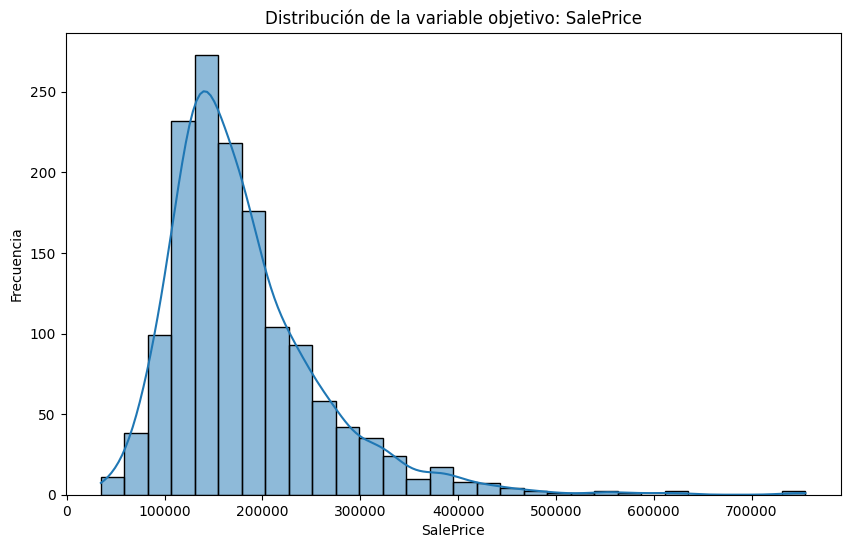

In [20]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
train_data = pd.read_csv('/content/h_train.csv')
test_data = pd.read_csv('/content/h_test.csv')

# Exploración inicial
def explorar_datos(data, nombre_dataset):
    print(f"Exploración inicial del dataset: {nombre_dataset}")
    print("Primeras filas:\n", data.head())
    print("\nInformación del dataset:")
    print(data.info())
    print("\nEstadísticas descriptivas:")
    print(data.describe())
    print("-" * 40)

# Explorar datos de entrenamiento y prueba
explorar_datos(train_data, "Train")
explorar_datos(test_data, "Test")

# Verificar nombres de columnas
print("Columnas en el dataset de entrenamiento:")
print(train_data.columns)

# Revisión de la distribución de la variable objetivo
def revisar_variable_objetivo(data, target):
    if target not in data.columns:
        print(f"La columna '{target}' no se encuentra en el dataset.")
        return
    plt.figure(figsize=(10, 6))
    sns.histplot(data[target], kde=True, bins=30)
    plt.title(f"Distribución de la variable objetivo: {target}")
    plt.xlabel(target)
    plt.ylabel("Frecuencia")
    plt.show()

revisar_variable_objetivo(train_data, 'SalePrice')


# 2. Exploración y Preprocesamiento de Datos

Variables numéricas:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Variables categóricas:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fir

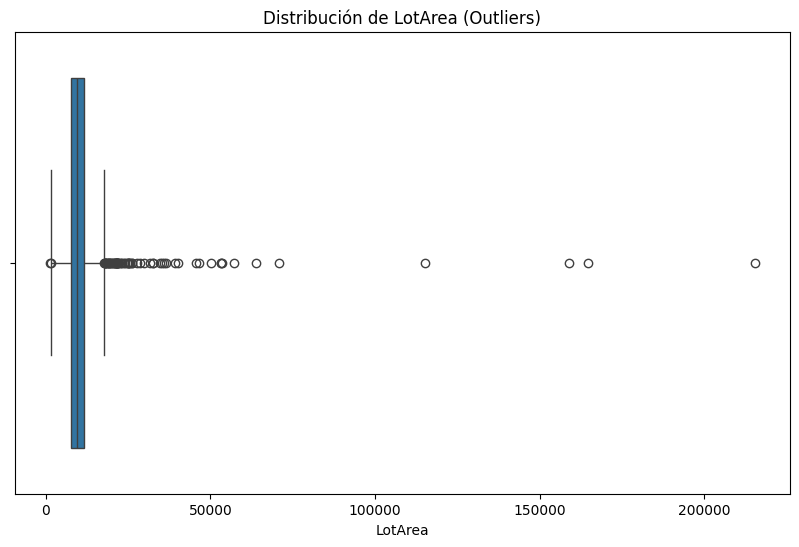

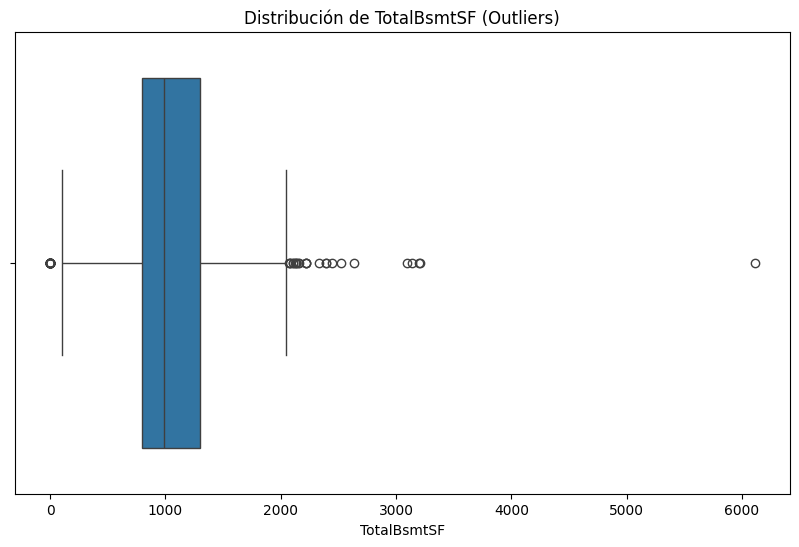

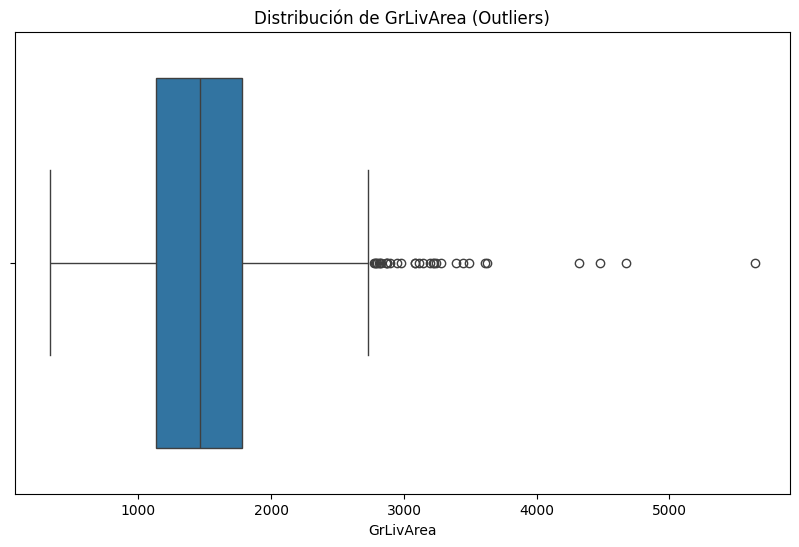

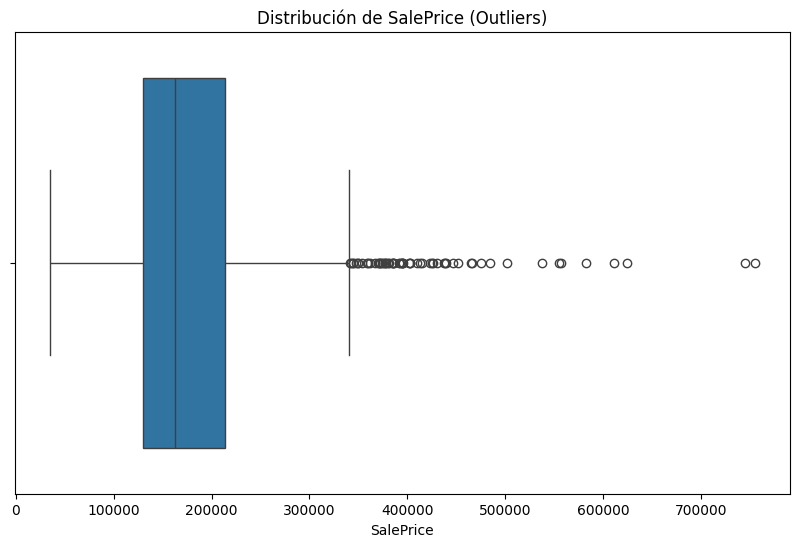

Coeficientes de asimetría:
 MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.676412
LotFrontage       2.384950
OpenPorchSF       2.364342
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.503562


In [21]:
from sklearn.impute import SimpleImputer

# Identificar variables numéricas y categóricas
def identificar_columnas(data):
    numericas = data.select_dtypes(include=[np.number]).columns.tolist()
    categoricas = data.select_dtypes(exclude=[np.number]).columns.tolist()
    return numericas, categoricas

numericas, categoricas = identificar_columnas(train_data)
print("Variables numéricas:\n", numericas)
print("Variables categóricas:\n", categoricas)

# Imputación de valores faltantes
def imputar_valores(data):
    # Imputar variables numéricas con la media
    numericas = data.select_dtypes(include=[np.number]).columns
    imputer_num = SimpleImputer(strategy='mean')
    data[numericas] = imputer_num.fit_transform(data[numericas])

    # Imputar variables categóricas con el valor más frecuente
    categoricas = data.select_dtypes(exclude=[np.number]).columns
    imputer_cat = SimpleImputer(strategy='most_frequent')
    data[categoricas] = imputer_cat.fit_transform(data[categoricas])

    return data

# Aplicar imputación al conjunto de entrenamiento y prueba
train_data = imputar_valores(train_data)
test_data = imputar_valores(test_data)

# Análisis de outliers para variables relevantes
variables_relevantes = ['LotArea', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
def analizar_outliers(data, columnas):
    for col in columnas:
        if col in data.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=data[col])
            plt.title(f"Distribución de {col} (Outliers)")
            plt.show()
        else:
            print(f"La columna '{col}' no está en el dataset.")

analizar_outliers(train_data, variables_relevantes)

# Identificar distribuciones asimétricas
def revisar_asimetria(data, columnas):
    asimetria = data[columnas].skew().sort_values(ascending=False)
    print("Coeficientes de asimetría:\n", asimetria)

revisar_asimetria(train_data, numericas)


# 3. Transformaciones de Variables



In [22]:
from sklearn.preprocessing import StandardScaler

# Transformaciones logarítmicas
def aplicar_transformaciones(data, log_vars):
    for col in log_vars:
        if col in data.columns:
            data[col] = np.log1p(data[col])
    return data

# Crear variables polinómicas
def crear_variables_polinomicas(data, columnas):
    for col in columnas:
        if col in data.columns:
            data[f'{col}_squared'] = data[col] ** 2
            data[f'{col}_cubed'] = data[col] ** 3
    return data

# Estandarizar las variables numéricas
def estandarizar_variables(data, columnas):
    scaler = StandardScaler()
    data[columnas] = scaler.fit_transform(data[columnas])
    return data

# Aplicar transformaciones al conjunto de entrenamiento
log_vars = ['SalePrice', 'LotArea', 'GrLivArea', 'TotalBsmtSF']
train_data = aplicar_transformaciones(train_data, log_vars)
train_data = crear_variables_polinomicas(train_data, ['LotArea', 'GrLivArea', 'TotalBsmtSF'])
train_data = estandarizar_variables(train_data, numericas)


# 4. Evaluación de las Transformaciones

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Identificar y codificar columnas categóricas
def codificar_categorias(data):
    # Seleccionar columnas categóricas
    categoricas = data.select_dtypes(exclude=[np.number]).columns
    print(f"Columnas categóricas: {list(categoricas)}")
    # Codificar usando dummies
    data = pd.get_dummies(data, columns=categoricas, drop_first=True)
    return data

# Codificar las variables categóricas en entrenamiento y prueba
train_data_encoded = codificar_categorias(train_data)
test_data_encoded = codificar_categorias(test_data)

# Alinear las columnas entre los datasets de entrenamiento y prueba
missing_cols = set(train_data_encoded.columns) - set(test_data_encoded.columns)
for col in missing_cols:
    test_data_encoded[col] = 0
test_data_encoded = test_data_encoded[train_data_encoded.columns.drop('SalePrice')]

# Dividir los datos en características (X) y la variable objetivo (y)
X = train_data_encoded.drop(columns=['SalePrice'])
y = train_data_encoded['SalePrice']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de regresión lineal y evaluación
def entrenar_y_evaluar_modelo(X_train, X_test, y_train, y_test):
    # Entrenar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Predicciones
    y_pred = model.predict(X_test)
    # Métricas de evaluación
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")
    return rmse, r2

# Evaluación del modelo
print("\nEvaluación con transformaciones:")
entrenar_y_evaluar_modelo(X_train, X_test, y_train, y_test)


Columnas categóricas: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Columnas categóricas: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Ce

(0.3558108479439303, 0.8810058197533187)